In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34b3a9ed23604546ffa94bdddf7e6ac0


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 12 | lebu
Processing Record 2 of Set 12 | mataura
Processing Record 3 of Set 12 | port alfred
Processing Record 4 of Set 12 | hermanus
Processing Record 5 of Set 12 | arraial do cabo
Processing Record 6 of Set 12 | bomet
Processing Record 7 of Set 12 | vaini
Processing Record 8 of Set 12 | punta arenas
Processing Record 9 of Set 12 | los llanos de aridane
Processing Record 10 of Set 12 | lavrentiya
Processing Record 11 of Set 12 | tuktoyaktuk
Processing Record 12 of Set 12 | saint-philippe
Processing Record 13 of Set 12 | tasiilaq
Processing Record 14 of Set 12 | busselton
Processing Record 15 of Set 12 | rikitea
Processing Record 16 of Set 12 | boali
Processing Record 17 of Set 12 | tuy hoa
Processing Record 18 of Set 12 | hilo
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | pisco
Processing Record 21 of Set 12 | abu kamal
Processing Record 22 of Set 12 | dikson
Processing Record 23 of Set 12 | taolanaro
Processing Record 24 of S

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 49 of Set 23 | lebu
Processing Record 50 of Set 23 | mataura
Processing Record 51 of Set 23 | port alfred
Processing Record 52 of Set 23 | hermanus
Processing Record 53 of Set 23 | arraial do cabo
Processing Record 54 of Set 23 | bomet
Processing Record 55 of Set 23 | vaini
Processing Record 56 of Set 23 | punta arenas
Processing Record 57 of Set 23 | los llanos de aridane
Processing Record 58 of Set 23 | lavrentiya
Processing Record 59 of Set 23 | tuktoyaktuk
Processing Record 60 of Set 23 | saint-philippe
Processing Record 61 of Set 23 | tasiilaq
Processing Record 62 of Set 23 | busselton
Processing Record 63 of Set 23 | rikitea
Processing Record 64 of Set 23 | boali
Processing Record 65 of Set 23 | tuy hoa
Processing Record 66 of Set 23 | hilo
Processing Record 67 of Set 23 | port blair
Processing Record 68 of Set 23 | pisco
Processing Record 69 of Set 23 | abu kamal
Processing Record 70 of Set 23 | dikson
Processing Record 71 of Set 23 | taolanaro
City not found. 

Processing Record 34 of Set 26 | udachnyy
Processing Record 35 of Set 26 | cabo san lucas
Processing Record 36 of Set 26 | dillon
Processing Record 37 of Set 26 | klaksvik
Processing Record 38 of Set 26 | goiatuba
Processing Record 39 of Set 26 | dudinka
Processing Record 40 of Set 26 | stromness
Processing Record 41 of Set 26 | dwarka
Processing Record 42 of Set 26 | avarua
Processing Record 43 of Set 26 | temiscaming
Processing Record 44 of Set 26 | port lavaca
Processing Record 45 of Set 26 | baker city
Processing Record 46 of Set 26 | pevek
Processing Record 47 of Set 26 | venado tuerto
Processing Record 48 of Set 26 | zabinka
City not found. Skipping...
Processing Record 49 of Set 26 | meaux
Processing Record 50 of Set 26 | grosseto
Processing Record 1 of Set 27 | mount gambier
Processing Record 2 of Set 27 | bathsheba
Processing Record 3 of Set 27 | siguiri
Processing Record 4 of Set 27 | iqaluit
Processing Record 5 of Set 27 | siirt
Processing Record 6 of Set 27 | pacific grove


Processing Record 19 of Set 30 | chumikan
Processing Record 20 of Set 30 | faanui
Processing Record 21 of Set 30 | dunedin
Processing Record 22 of Set 30 | te anau
Processing Record 23 of Set 30 | kinel
Processing Record 24 of Set 30 | severnyy
Processing Record 25 of Set 30 | tawnat
City not found. Skipping...
Processing Record 26 of Set 30 | corn island
Processing Record 27 of Set 30 | rio gallegos
Processing Record 28 of Set 30 | palmerston
Processing Record 29 of Set 30 | muisne
Processing Record 30 of Set 30 | bemidji
Processing Record 31 of Set 30 | ambur
Processing Record 32 of Set 30 | debre zeyit
Processing Record 33 of Set 30 | dalvik
Processing Record 34 of Set 30 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 30 | la uribe
City not found. Skipping...
Processing Record 36 of Set 30 | bilibino
Processing Record 37 of Set 30 | mayumba
Processing Record 38 of Set 30 | bogomila
Processing Record 39 of Set 30 | harper
Processing Record 40 of Set 30 | salvador

Processing Record 3 of Set 34 | mayahi
Processing Record 4 of Set 34 | ostersund
Processing Record 5 of Set 34 | tura
Processing Record 6 of Set 34 | havoysund
Processing Record 7 of Set 34 | luba
Processing Record 8 of Set 34 | jatai
Processing Record 9 of Set 34 | misratah
Processing Record 10 of Set 34 | huoqiu
Processing Record 11 of Set 34 | mackenzie
Processing Record 12 of Set 34 | zaraza
Processing Record 13 of Set 34 | sao filipe
Processing Record 14 of Set 34 | cooma
Processing Record 15 of Set 34 | paramonga
Processing Record 16 of Set 34 | dujuma
City not found. Skipping...
Processing Record 17 of Set 34 | nabire
Processing Record 18 of Set 34 | tornio
Processing Record 19 of Set 34 | angarsk
Processing Record 20 of Set 34 | kalakamati
Processing Record 21 of Set 34 | shimoda
Processing Record 22 of Set 34 | naryan-mar
Processing Record 23 of Set 34 | albanel
Processing Record 24 of Set 34 | matagami
Processing Record 25 of Set 34 | opelousas
Processing Record 26 of Set 34 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,50.88,88,100,8.88,CL,2021-07-23 05:59:31
1,Mataura,-46.1927,168.8643,40.15,95,53,3.11,NZ,2021-07-23 06:03:08
2,Port Alfred,-33.5906,26.8910,52.50,70,91,14.79,ZA,2021-07-23 06:03:08
3,Hermanus,-34.4187,19.2345,41.90,76,35,11.59,ZA,2021-07-23 06:03:08
4,Arraial Do Cabo,-22.9661,-42.0278,67.80,74,11,10.42,BR,2021-07-23 06:03:09
5,Bomet,-0.7813,35.3416,64.20,61,26,3.74,KE,2021-07-23 06:03:09
6,Vaini,-21.2000,-175.2000,75.74,81,12,10.18,TO,2021-07-23 06:03:09
7,Punta Arenas,-53.1500,-70.9167,35.71,87,20,13.80,CL,2021-07-23 05:58:54
8,Los Llanos De Aridane,28.6585,-17.9182,69.55,92,0,17.27,ES,2021-07-23 06:03:10
9,Lavrentiya,65.5833,-171.0000,43.39,82,88,2.19,RU,2021-07-23 06:03:10


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-07-23 05:59:31,-37.6167,-73.6500,50.88,88,100,8.88
1,Mataura,NZ,2021-07-23 06:03:08,-46.1927,168.8643,40.15,95,53,3.11
2,Port Alfred,ZA,2021-07-23 06:03:08,-33.5906,26.8910,52.50,70,91,14.79
3,Hermanus,ZA,2021-07-23 06:03:08,-34.4187,19.2345,41.90,76,35,11.59
4,Arraial Do Cabo,BR,2021-07-23 06:03:09,-22.9661,-42.0278,67.80,74,11,10.42
5,Bomet,KE,2021-07-23 06:03:09,-0.7813,35.3416,64.20,61,26,3.74
6,Vaini,TO,2021-07-23 06:03:09,-21.2000,-175.2000,75.74,81,12,10.18
7,Punta Arenas,CL,2021-07-23 05:58:54,-53.1500,-70.9167,35.71,87,20,13.80
8,Los Llanos De Aridane,ES,2021-07-23 06:03:10,28.6585,-17.9182,69.55,92,0,17.27
9,Lavrentiya,RU,2021-07-23 06:03:10,65.5833,-171.0000,43.39,82,88,2.19


In [16]:
# Import the time module.
import time

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

NameError: name 'max_temps' is not defined

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

NameError: name 'humidity' is not defined

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

NameError: name 'cloudiness' is not defined

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

NameError: name 'wind_speed' is not defined

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-07-23 06:03:11
Lat                        -33.65
Lng                      115.3333
Max Temp                    57.09
Humidity                       57
Cloudiness                     85
Wind Speed                  18.12
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,Los Llanos De Aridane,ES,2021-07-23 06:03:10,28.6585,-17.9182,69.55,92,0,17.27
9,Lavrentiya,RU,2021-07-23 06:03:10,65.5833,-171.0000,43.39,82,88,2.19
10,Tuktoyaktuk,CA,2021-07-23 06:03:10,69.4541,-133.0374,44.01,85,29,15.19
12,Tasiilaq,GL,2021-07-23 06:03:11,65.6145,-37.6368,39.36,97,100,0.92
15,Boali,CF,2021-07-23 06:03:12,4.8005,18.1275,72.25,93,99,2.71
...,...,...,...,...,...,...,...,...,...
545,Palimbang,PH,2021-07-23 06:05:58,6.2106,124.1894,86.95,67,79,6.96
546,Svetlogorsk,BY,2021-07-23 06:05:58,52.6333,29.7333,66.70,57,7,6.98
547,Anloga,GH,2021-07-23 06:05:58,5.7947,0.8973,76.05,84,89,11.68
548,Acajutla,SV,2021-07-23 06:05:59,13.5928,-89.8275,81.57,70,98,6.35


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,Los Llanos De Aridane,ES,2021-07-23 06:03:10,28.6585,-17.9182,69.55,92,0,17.27
9,Lavrentiya,RU,2021-07-23 06:03:10,65.5833,-171.0000,43.39,82,88,2.19
10,Tuktoyaktuk,CA,2021-07-23 06:03:10,69.4541,-133.0374,44.01,85,29,15.19
12,Tasiilaq,GL,2021-07-23 06:03:11,65.6145,-37.6368,39.36,97,100,0.92
15,Boali,CF,2021-07-23 06:03:12,4.8005,18.1275,72.25,93,99,2.71


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

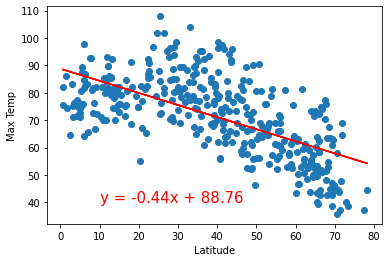

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

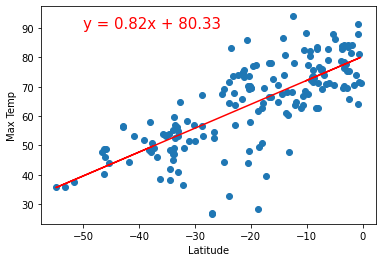

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

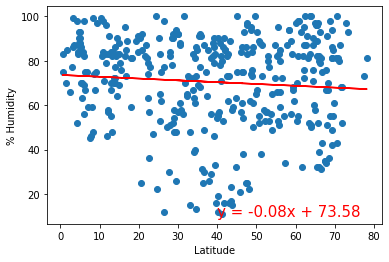

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

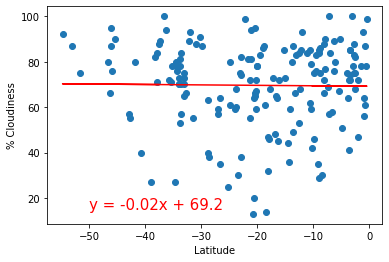

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

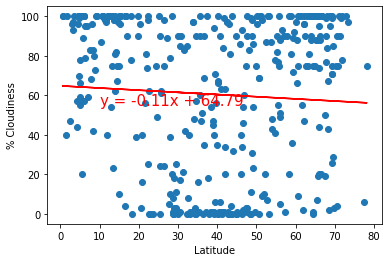

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

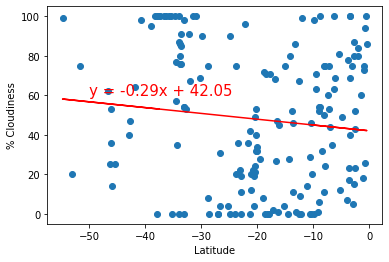

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

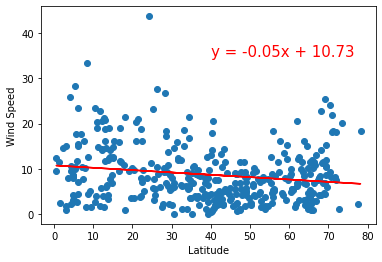

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

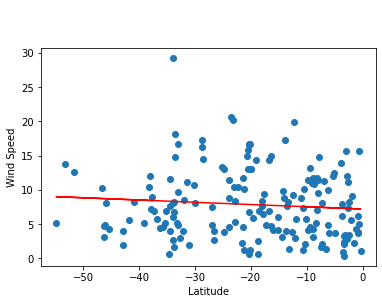

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))